In [9]:
import unittest
import subprocess
import os
import numpy as np
from birdsynth import synth as csynth
from io import BytesIO

%pylab --n
%matplotlib inline

import seaborn as sns

# test path actually
dir_path = 'birdsynth/test/'



def iosynth(alpha_beta):
    """Return the song signal given the alpha beta parameters.

    alpha_beta - A 2d numpy.array of shape (length, 2)
                 with alpha on the alpha_beta[:, 0] elements
                 and beta on the alpha_beta[:, 1] elements

    Returns - 1D numpy.array with the normalized signal between -1 and 1
    """
    input_bytes = BytesIO()
    input_bytes.write(bytes(str(alpha_beta.shape[0]) + "\n", 'utf-8'))
    np.savetxt(input_bytes, alpha_beta)
    out_raw_call = subprocess.Popen(
        [os.path.join(dir_path, "alphabeta2dat")],
        stdin=subprocess.PIPE,
        stdout=subprocess.PIPE)
    out_raw = out_raw_call.communicate(input=input_bytes.getvalue())[0]
    input_bytes.close()
    out = np.fromstring(out_raw, dtype=float, sep="\n")
    return out

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [10]:
from IPython.display import display, Audio

In [11]:
ab = np.loadtxt(os.path.join(dir_path, 'ba_example_ab.dat'))
ioout = iosynth(ab)
cout = csynth(ab)

In [12]:
ioout -= np.nanmean(ioout)
ioout = 2 * (ioout - np.nanmin(ioout)) / (np.nanmax(ioout) - np.nanmin(ioout)) - 1
cout -= np.nanmean(cout)
coout = 2 * (cout - np.nanmin(cout)) / (np.nanmax(cout) - np.nanmin(cout)) - 1

In [13]:
Audio(ioout, rate=44100)

In [14]:
Audio(cout, rate=44100)

In [15]:
np.vstack((ioout[~np.isclose(ioout, coout, rtol=0.001)],
cout[~np.isclose(ioout, coout, rtol=0.001)]))

array([[ -2.14887844e-01,  -2.14915591e-01,  -2.15669959e-01, ...,
          6.84147010e-04,   4.37959408e-04,  -7.86834888e-04],
       [  3.38079723e+00,   3.08395946e+00,  -3.74233986e+00, ...,
          4.92113651e+03,   4.91553096e+03,   4.88762257e+03]])

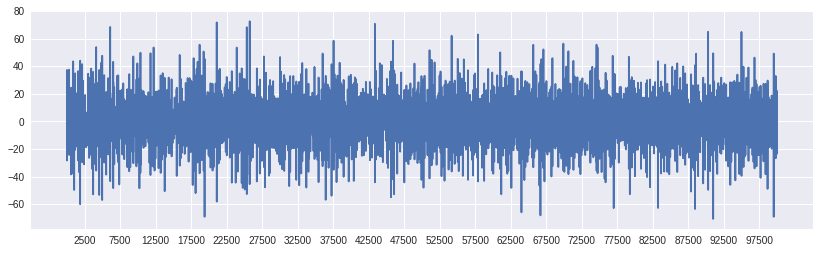

25748

In [17]:
ab = np.zeros((100000, 2))
ab[:, 1] = 0
ab[:, 0] = 0


plt.figure(figsize=(14, 4))
plt.plot(csynth(ab))
plt.xticks(np.arange(2500, 100000, 5000), np.arange(2500, 100000, 5000))
plt.show()
np.argmax(csynth(ab))